### Compute the dot product of two vectors

In [2]:
def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

# Example
v1 = [1, 2, 3]
v2 = [4, 5, 6]
print("Dot Product:", dot_product(v1, v2))

Dot Product: 32


### NumPy array (3x3): Transpose, Determinant, Inverse

In [3]:
import numpy as np

A = np.array([[1, 2, 3],
              [0, 1, 4],
              [5, 6, 0]])

print("Transpose:\n", A.T)
print("Determinant:", np.linalg.det(A))
print("Inverse:\n", np.linalg.inv(A))

Transpose:
 [[1 0 5]
 [2 1 6]
 [3 4 0]]
Determinant: 0.9999999999999987
Inverse:
 [[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


### Load Iris dataset and show statistics

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


### Scatter plot between two features

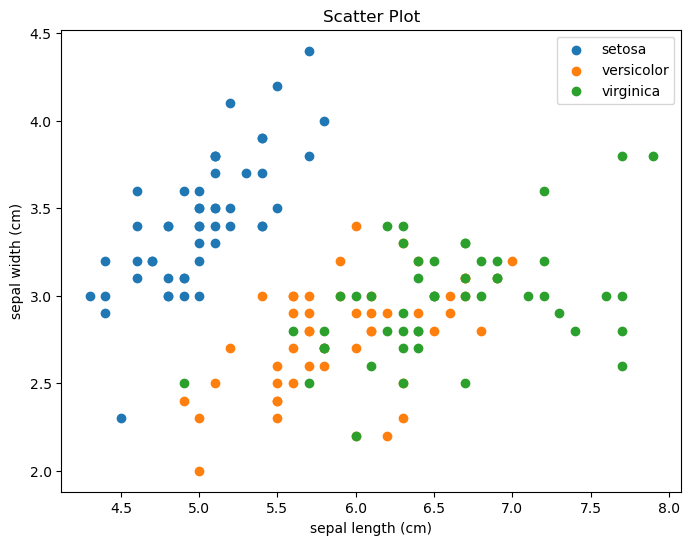

In [5]:
import matplotlib.pyplot as plt

x = df[iris.feature_names[0]]
y = df[iris.feature_names[1]]
labels = iris.target

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(x[labels == i], y[labels == i], label=iris.target_names[i])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatter Plot")
plt.legend()
plt.show()


### Simulate binary classification and compute metrics

In [7]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Fixing the parameters explicitly
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion Matrix:
 [[14  0]
 [ 0 16]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## 2. Predict student exam performance

### Creating a dataset

In [8]:
import pandas as pd

data = {
    "Study_Hours": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Attendance":  [60, 65, 70, 75, 80, 85, 90, 95, 95, 100],
    "Sleep_Hours": [6, 6.5, 6, 7, 7.5, 8, 7.5, 6, 5.5, 5],
    "Score":       [40, 45, 50, 55, 60, 70, 75, 85, 90, 95]
}
df = pd.DataFrame(data)

### a) Load, describe, plot

   Study_Hours  Attendance  Sleep_Hours  Score
0            1          60          6.0     40
1            2          65          6.5     45
2            3          70          6.0     50
3            4          75          7.0     55
4            5          80          7.5     60
       Study_Hours  Attendance  Sleep_Hours      Score
count     10.00000   10.000000    10.000000  10.000000
mean       5.50000   81.500000     6.500000  66.500000
std        3.02765   13.753787     0.971825  19.443651
min        1.00000   60.000000     5.000000  40.000000
25%        3.25000   71.250000     6.000000  51.250000
50%        5.50000   82.500000     6.250000  65.000000
75%        7.75000   93.750000     7.375000  82.500000
max       10.00000  100.000000     8.000000  95.000000


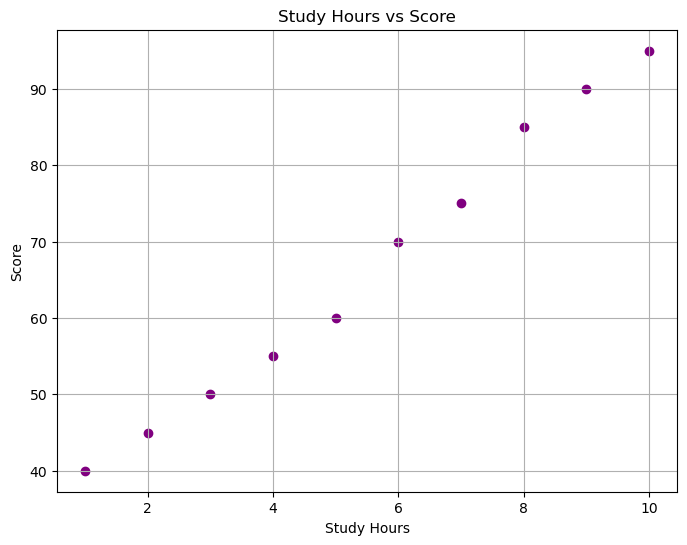

In [9]:
print(df.head())
print(df.describe())

plt.figure(figsize=(8, 6))
plt.scatter(df["Study_Hours"], df["Score"], color='purple')
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.title("Study Hours vs Score")
plt.grid(True)
plt.show()

### b) Matrix form: mean, covariance, eigenvalues

In [10]:
X = df[["Study_Hours", "Attendance", "Sleep_Hours", "Score"]].values

mean_vector = np.mean(X, axis=0)
cov_matrix = np.cov(X.T)
eigenvalues, _ = np.linalg.eig(cov_matrix)

print("Mean Vector:", mean_vector)
print("Covariance Matrix:\n", cov_matrix)
print("Eigenvalues:", eigenvalues)

Mean Vector: [ 5.5 81.5  6.5 66.5]
Covariance Matrix:
 [[  9.16666667  41.38888889  -0.77777778  58.61111111]
 [ 41.38888889 189.16666667  -2.5        264.16666667]
 [ -0.77777778  -2.5          0.94444444  -5.83333333]
 [ 58.61111111 264.16666667  -5.83333333 378.05555556]]
Eigenvalues: [5.73347811e+02 3.68705167e+00 3.62017829e-02 2.62269129e-01]


### c) Histogram, boxplot, and descriptive stats

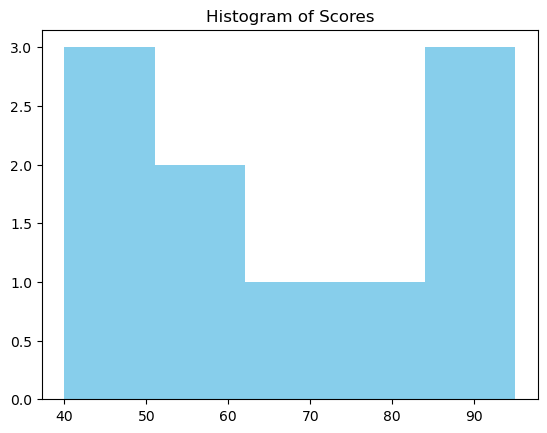

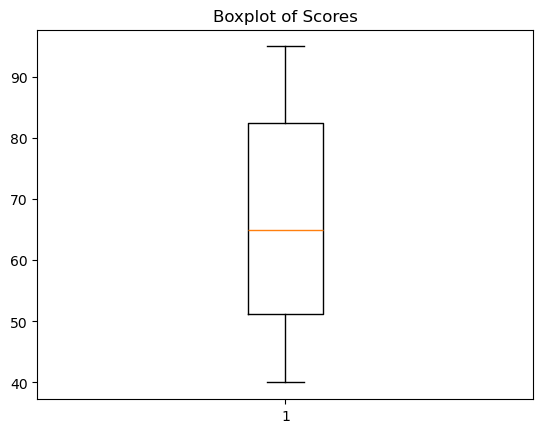

Mean: 66.5
Median: 65.0
Mode: 40
Standard Deviation: 19.443650777453175
Skewness: 0.13192683268558208
Kurtosis: -1.369647053615437


In [11]:
from scipy.stats import skew, kurtosis, mode

plt.hist(df["Score"], bins=5, color="skyblue")
plt.title("Histogram of Scores")
plt.show()

plt.boxplot(df["Score"])
plt.title("Boxplot of Scores")
plt.show()

print("Mean:", df["Score"].mean())
print("Median:", df["Score"].median())
print("Mode:", mode(df["Score"], keepdims=False).mode)
print("Standard Deviation:", df["Score"].std())
print("Skewness:", skew(df["Score"]))
print("Kurtosis:", kurtosis(df["Score"]))

### d) Train/test split, Linear Regression, metrics, plot

Mean Squared Error: 3.6939959685219503
R² Score: 0.9927032178399566


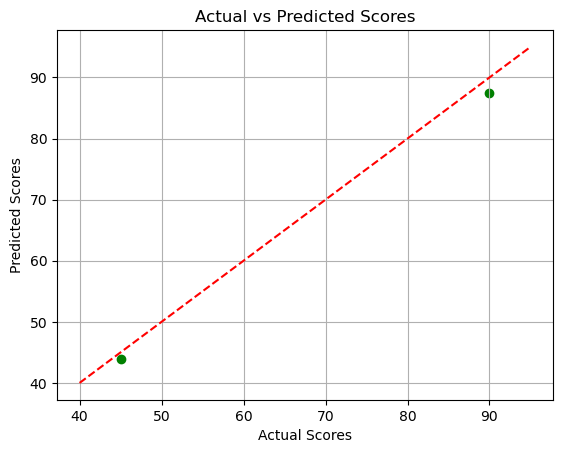

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df[["Study_Hours", "Attendance", "Sleep_Hours"]]
y = df["Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()